Import The Libreries

In [1]:
import math
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

Get Data

In [4]:
dataSet=pd.read_csv('./AAPL (1).csv')
dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)
dataset = dataSet.set_index("Date")
data_close = dataset['Close']
df = dataset['Close']

Visualize DataFrame


<Axes: title={'center': "AAPL 'Close'"}, xlabel='Date', ylabel='Close Price'>

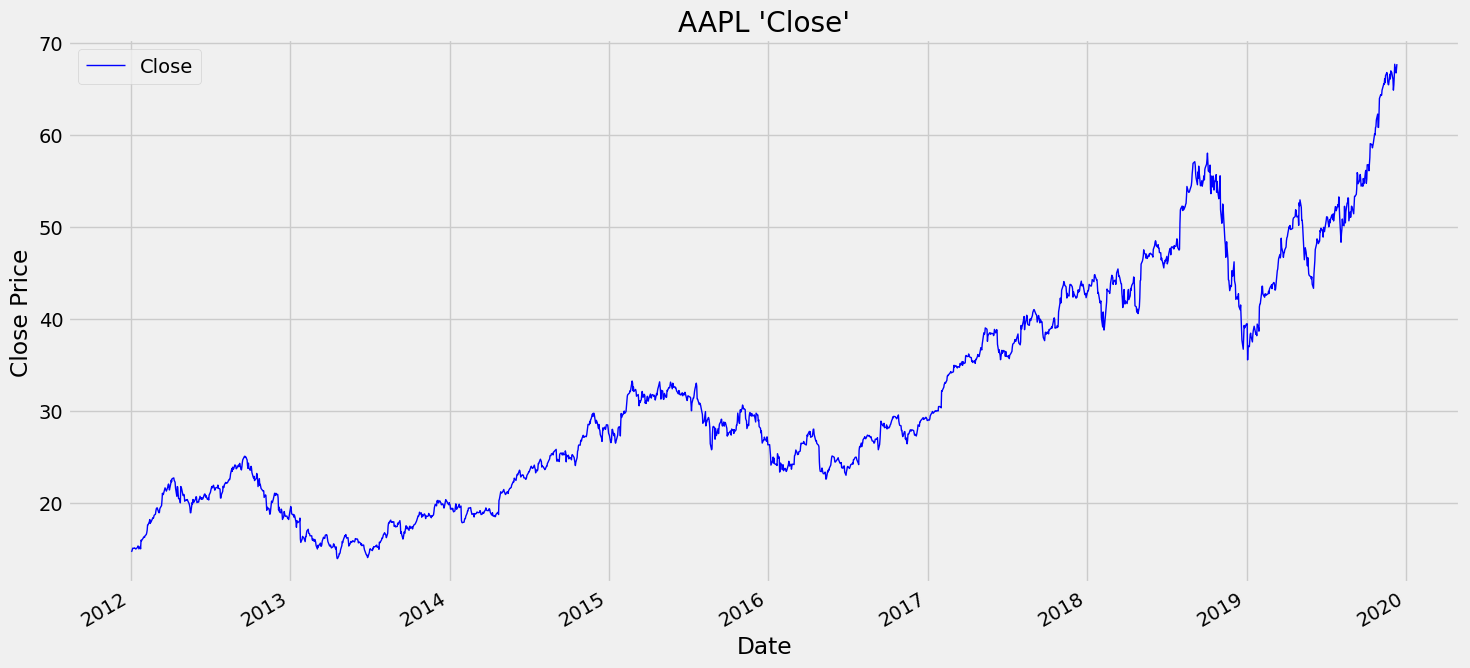

In [5]:
data_close.plot(figsize=(16,8),color="blue",xlabel='Date',ylabel='Close Price',title="AAPL 'Close'",legend="Close Price",linewidth=1)

Get Number of train data


In [6]:
len_data_train = math.ceil(len(df)*.85)


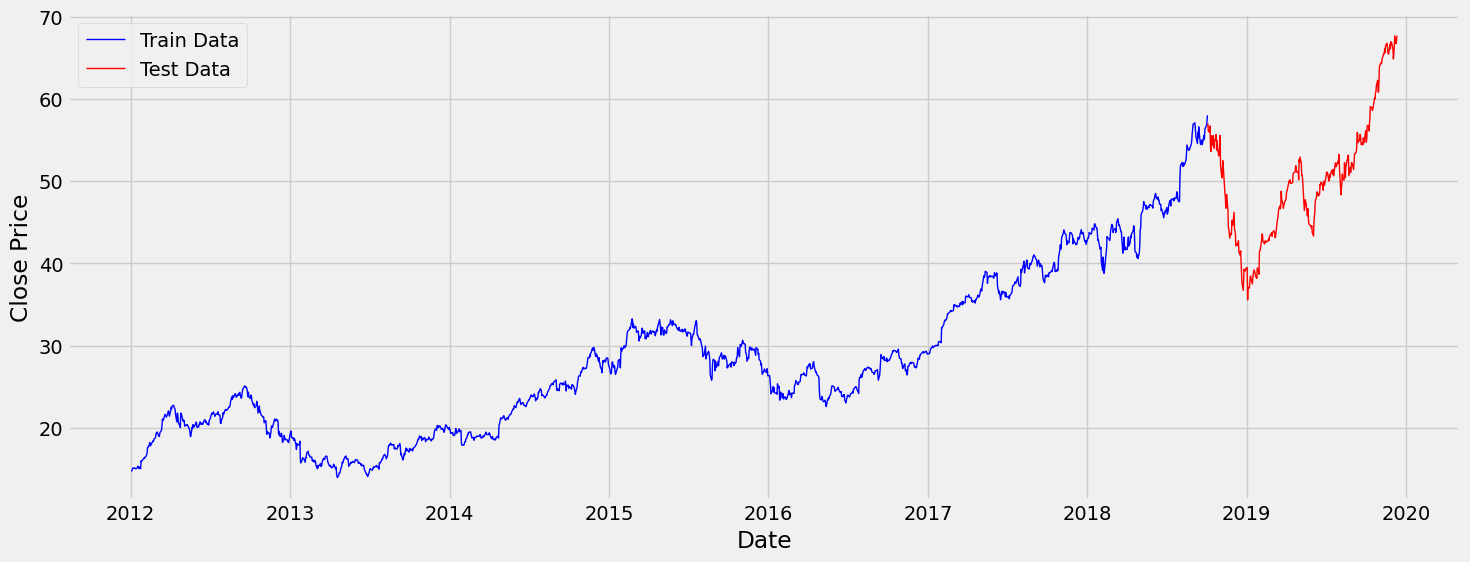

In [7]:
train=df[:len_data_train]
test=df[len_data_train:]
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train,"blue",label="Train Data",linewidth=1)
plt.plot(test,"red",label="Test Data",linewidth=1)
plt.legend()
plt.show()

In [8]:
scaler = MinMaxScaler()
df = np.array(df).reshape(len(df),1)
scaler_data = scaler.fit_transform(df)

Split Data to train & test


In [9]:
# create the training data
train_data = scaler_data[0:len_data_train, :]
timestep=60
# split the train data
x_train = []
y_train = []
for i in range(timestep, len(train_data)):
    x_train.append(train_data[i-timestep:i, 0])
    y_train.append(train_data[i, 0])

# convert the data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
 # create the data test
test_data = scaler_data[len_data_train-timestep:, :]

# create x_test & y_test
x_test = []
y_test = df[len_data_train:, :]
for i in range(timestep, len(test_data)):
    x_test.append(test_data[i-timestep:i, 0])

# convert the data to a numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Build And Train Lstm Model

In [14]:
model = Sequential()
model.add(GRU(50, return_sequences=True,
              input_shape=(x_train.shape[1], 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model
model.fit(x_train, y_train, epochs=25)

Epoch 1/50
52/52 [==============================] - 28s 171ms/step - loss: 0.0051
Epoch 2/50
52/52 [==============================] - 11s 221ms/step - loss: 4.0032e-04
Epoch 3/50
52/52 [==============================] - 12s 228ms/step - loss: 3.6692e-04
Epoch 4/50
52/52 [==============================] - 13s 255ms/step - loss: 3.9955e-04
Epoch 5/50
52/52 [==============================] - 11s 219ms/step - loss: 3.3903e-04
Epoch 6/50
52/52 [==============================] - 9s 177ms/step - loss: 3.2880e-04
Epoch 7/50
52/52 [==============================] - 8s 163ms/step - loss: 3.5157e-04
Epoch 8/50
52/52 [==============================] - 8s 162ms/step - loss: 3.3726e-04
Epoch 9/50
52/52 [==============================] - 8s 162ms/step - loss: 3.0770e-04
Epoch 10/50
52/52 [==============================] - 8s 160ms/step - loss: 2.7776e-04
Epoch 11/50
52/52 [==============================] - 9s 174ms/step - loss: 2.9606e-04
Epoch 12/50
52/52 [==============================] - 9s 178ms/

In [17]:
# Prodection the data values
pred = model.predict(x_test)
prediction = scaler.inverse_transform(pred)


10/10 [==============================] - 6s 82ms/step


Plot Train & Test & Prediction 


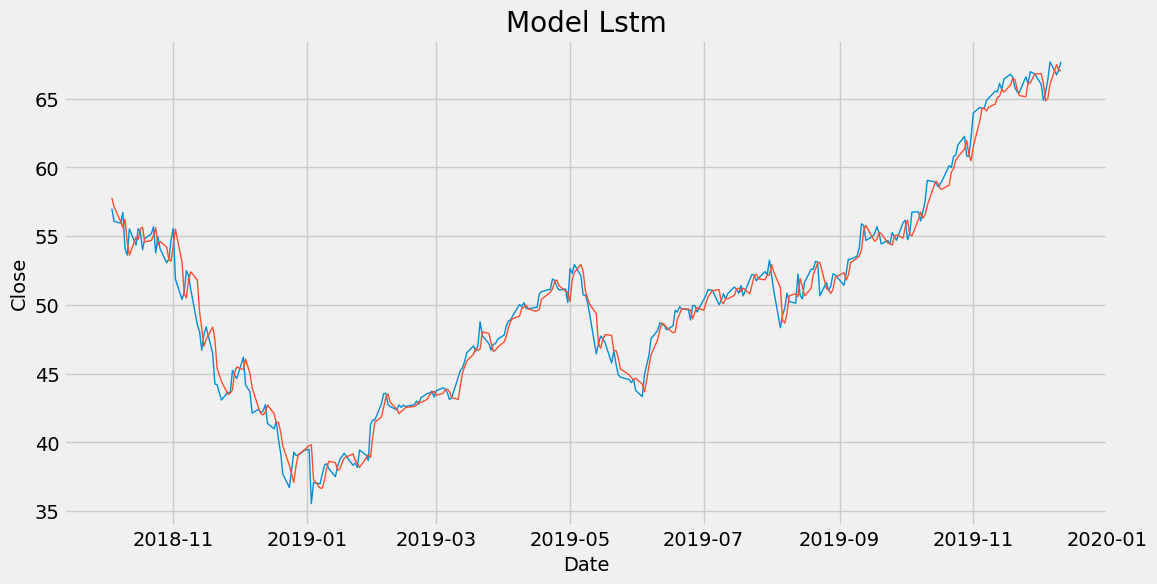

In [18]:
data_range = data_close[len_data_train:].index
train = data_close[:len_data_train]
actual = data_close[len_data_train:]
plt.figure(figsize=(12, 6))
plt.title("Model Lstm")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
# plt.plot(train,"green", linewidth=1)
plt.plot(data_range,actual,linewidth=1)
plt.plot(data_range,prediction,linewidth=1)
plt.show()

In [19]:
print(f"MAE : {mean_absolute_error(actual,prediction)}")
print(f"MSE : {mean_squared_error(actual,prediction)}")



MAE : 0.7477081742992592
MSE : 1.0205574830124007
